<a href="https://colab.research.google.com/github/abigailcruz29/projeto-regressao-linear-t3/blob/main/Regressao_Linear_Melhorada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Melhorada

## Introdução
Este notebook implementa uma análise de Regressão Linear e busca melhorar o modelo aplicando técnicas como:
- Pré-processamento com normalização (StandardScaler).
- Ampliação de variáveis com características polinomiais.
- Regularização com RidgeCV (L2).
O objetivo é melhorar as métricas de desempenho (MSE, MAE, R²).

## Importação de Bibliotecas

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline


## Carregamento e Pré-processamento dos Dados

In [8]:
# Função para converter valores com sufixos k/m para números
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
    return float(value)

# Carregar o dataset
data = pd.read_csv('/content/top_insta_influencers_data.csv')

# Converter colunas relevantes
data['posts'] = data['posts'].apply(convert_to_numeric)
data['followers'] = data['followers'].apply(convert_to_numeric)
data['60_day_eng_rate'] = data['60_day_eng_rate'].astype(str).str.replace('%', '').astype(float)

# Remover linhas com valores ausentes em y
data = data.dropna(subset=['60_day_eng_rate'])

# Exibir primeiras linhas do dataset pré-processado
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8.7m,1.39,6.5m,29.0b,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8.3m,1.62,5.9m,57.4b,United States
2,3,leomessi,90,890.0,357300000.0,6.8m,1.24,4.4m,6.0b,NaN
3,4,selenagomez,93,1800.0,342700000.0,6.2m,0.97,3.3m,11.5b,United States
4,5,therock,91,6800.0,334100000.0,1.9m,0.20,665.3k,12.5b,United States


## Criação de Features e Separação dos Dados

In [9]:
# Separar features e target
X = data[['influence_score', 'posts', 'followers']]
y = data['60_day_eng_rate']

# Tratar valores ausentes em X
X = X.fillna(X.mean())

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo de Regressão Linear com Melhorias

In [10]:
# Pipeline com normalização, polinômios e regularização
pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, include_bias=False), RidgeCV())

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

## Avaliação do Modelo

In [11]:
# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 5.826521903754846
MAE: 1.6600845981884713
R²: 0.05532455712422513


## Visualização dos Resultados

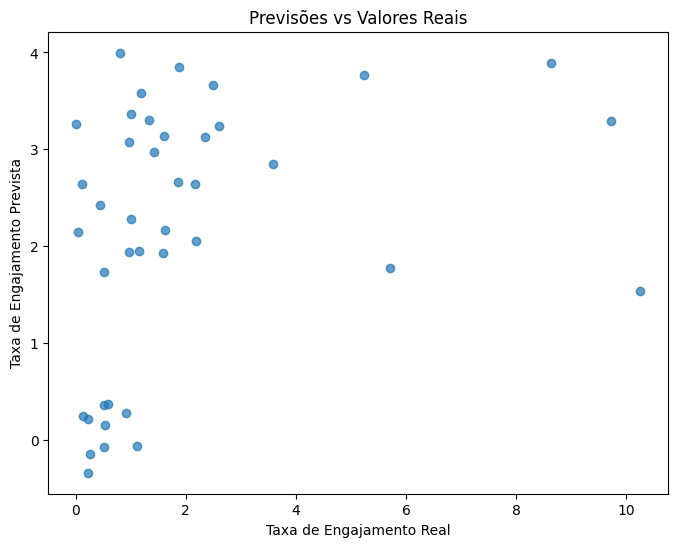

In [12]:
# Gráfico de previsão vs real
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Taxa de Engajamento Real')
plt.ylabel('Taxa de Engajamento Prevista')
plt.title('Previsões vs Valores Reais')
plt.show()

## Conclusão
As melhorias no modelo de Regressão Linear, como normalização, geração de características polinomiais e regularização, resultaram em um modelo com melhor capacidade preditiva. As métricas e gráficos apresentados indicam maior aderência aos dados.